<a href="https://colab.research.google.com/github/GuilhermePiotto/.NET/blob/main/Estudo_de_vendas_de_jogos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Trazer o Pandas para utilização
import pandas as pd 
import numpy as np
import seaborn as sns

In [ ]:
games = pd.read_csv("vgscore.csv", header=0)

In [ ]:
games.head()

,title,user_Score,release_Date,console,url,publisher,developer,tot_ship,tot_sale,na_sale,pal_sale,jp_sale,other_sale,last_update,VGscore
0,Wii Sports,N/A,19th Nov 06,Wii,http://www.vgchartz.com/game/2667/wii-sports/?...,Nintendo,Nintendo EAD,82.87m,NaN,NaN,NaN,NaN,NaN,NaN,N/A
1,Super Mario Bros.,8.2,18th Oct 85,NES,http://www.vgchartz.com/game/6455/super-mario-...,Nintendo,Nintendo EAD,40.24m,NaN,NaN,NaN,NaN,NaN,NaN,N/A
2,Mario Kart Wii,9.1,27th Apr 08,Wii,http://www.vgchartz.com/game/6968/mario-kart-w...,Nintendo,Nintendo EAD,37.20m,NaN,NaN,NaN,NaN,NaN,11th Apr 18,8.7
3,PlayerUnknown's Battlegrounds,N/A,21st Dec 17,PC,http://www.vgchartz.com/game/215988/playerunkn...,PUBG Corporation,PUBG Corporation,36.60m,NaN,NaN,NaN,NaN,NaN,13th Nov 18,N/A
4,Wii Sports Resort,8.8,26th Jul 09,Wii,http://www.vgchartz.com/game/24656/wii-sports-...,Nintendo,Nintendo EAD,33.10m,NaN,NaN,NaN,NaN,NaN,NaN,8.8


In [ ]:
games.shape

(55864, 15)

In [ ]:
games.columns

Index(['title', 'user_Score', 'release_Date', 'console', 'url', 'publisher',
       'developer', 'tot_ship', 'tot_sale', 'na_sale', 'pal_sale', 'jp_sale',
       'other_sale', 'last_update', 'VGscore'],
      dtype='object')

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55864 entries, 0 to 55863
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         55864 non-null  object
 1   user_Score    55864 non-null  object
 2   release_Date  55864 non-null  object
 3   console       55864 non-null  object
 4   url           55864 non-null  object
 5   publisher     55864 non-null  object
 6   developer     55864 non-null  object
 7   tot_ship      1966 non-null   object
 8   tot_sale      19409 non-null  object
 9   na_sale       12961 non-null  object
 10  pal_sale      13186 non-null  object
 11  jp_sale       7041 non-null   object
 12  other_sale    15518 non-null  object
 13  last_update   9427 non-null   object
 14  VGscore       55864 non-null  object
dtypes: object(15)
memory usage: 6.4+ MB


In [ ]:
for para_trocar in ["user_Score","VGscore"]:
  games.loc[games[para_trocar] == "N/A  ", para_trocar] = 0

In [ ]:
colunas_para_converter = ["user_Score", "VGscore"]
games[colunas_para_converter] = games[colunas_para_converter].apply(pd.to_numeric)

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55864 entries, 0 to 55863
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         55864 non-null  object 
 1   user_Score    55864 non-null  float64
 2   release_Date  55864 non-null  object 
 3   console       55864 non-null  object 
 4   url           55864 non-null  object 
 5   publisher     55864 non-null  object 
 6   developer     55864 non-null  object 
 7   tot_ship      1966 non-null   object 
 8   tot_sale      19409 non-null  object 
 9   na_sale       12961 non-null  object 
 10  pal_sale      13186 non-null  object 
 11  jp_sale       7041 non-null   object 
 12  other_sale    15518 non-null  object 
 13  last_update   9427 non-null   object 
 14  VGscore       55864 non-null  float64
dtypes: float64(2), object(13)
memory usage: 6.4+ MB


In [ ]:
games_limpo = games.dropna(subset=['tot_sale'])

In [ ]:
games_limpo.isna().sum()

title               0
user_Score          0
release_Date        0
console             0
url                 0
publisher           0
developer           0
tot_ship        19409
tot_sale            0
na_sale          6448
pal_sale         6223
jp_sale         12368
other_sale       3891
last_update     15480
VGscore             0
dtype: int64

In [ ]:
games_limpo.dropna(subset=['na_sale', 'pal_sale', 'jp_sale', 'other_sale'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
games_limpo.isna().sum()

title              0
user_Score         0
release_Date       0
console            0
url                0
publisher          0
developer          0
tot_ship        2416
tot_sale           0
na_sale            0
pal_sale           0
jp_sale            0
other_sale         0
last_update     1669
VGscore            0
dtype: int64

In [ ]:
games_limpo.drop(labels=['tot_ship'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
games_limpo.head()

,title,user_Score,release_Date,console,url,publisher,developer,tot_sale,na_sale,pal_sale,jp_sale,other_sale,last_update,VGscore
19,Grand Theft Auto V,0.0,17th Sep 13,PS3,http://www.vgchartz.com/game/65884/grand-theft...,Rockstar Games,Rockstar North,20.32m,6.37m,9.85m,0.99m,3.12m,NaN,0.0
20,Grand Theft Auto V,0.0,18th Nov 14,PS4,http://www.vgchartz.com/game/83196/grand-theft...,Rockstar Games,Rockstar North,19.39m,6.06m,9.71m,0.60m,3.02m,03rd Jan 18,0.0
32,Grand Theft Auto: Vice City,0.0,28th Oct 02,PS2,http://www.vgchartz.com/game/896/grand-theft-a...,Rockstar Games,Rockstar North,16.15m,8.41m,5.49m,0.47m,1.78m,NaN,0.0
33,Grand Theft Auto V,0.0,17th Sep 13,X360,http://www.vgchartz.com/game/65883/grand-theft...,Rockstar Games,Rockstar North,15.86m,9.06m,5.33m,0.06m,1.42m,NaN,0.0
35,Call of Duty: Black Ops 3,0.0,06th Nov 15,PS4,http://www.vgchartz.com/game/85359/call-of-dut...,Activision,Treyarch,15.09m,6.18m,6.05m,0.41m,2.44m,14th Jan 18,0.0


In [ ]:
games_limpo['tot_sale'] = games_limpo['tot_sale'].str.replace('m', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
games_limpo['na_sale'] = games_limpo['na_sale'].str.replace('m', '')
games_limpo['jp_sale'] = games_limpo['jp_sale'].str.replace('m', '')
games_limpo['pal_sale'] = games_limpo['pal_sale'].str.replace('m', '')
games_limpo['other_sale'] = games_limpo['other_sale'].str.replace('m', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
games_limpo['na_sale'] = games_limpo['na_sale'].apply(pd.to_numeric)
games_limpo['tot_sale'] = games_limpo['tot_sale'].apply(pd.to_numeric)
games_limpo['pal_sale'] = games_limpo['pal_sale'].apply(pd.to_numeric)
games_limpo['jp_sale'] = games_limpo['jp_sale'].apply(pd.to_numeric)
games_limpo['other_sale'] = games_limpo['other_sale'].apply(pd.to_numeric)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
games_limpo.dtypes

title            object
user_Score      float64
release_Date     object
console          object
url              object
publisher        object
developer        object
tot_sale        float64
na_sale         float64
pal_sale        float64
jp_sale         float64
other_sale      float64
last_update      object
VGscore         float64
dtype: object

In [ ]:
games_limpo.describe()

,user_Score,tot_sale,na_sale,pal_sale,jp_sale,other_sale,VGscore
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000
mean,0.384644,1.224218,0.549524,0.414942,0.116668,0.143088,0.716722
std,1.779955,1.830026,0.910366,0.784255,0.191924,0.271224,2.293146
min,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.290000,0.100000,0.040000,0.020000,0.020000,0.000000
50%,0.000000,0.600000,0.230000,0.150000,0.050000,0.050000,0.000000
75%,0.000000,1.340000,0.590000,0.450000,0.140000,0.140000,0.000000
max,10.000000,20.320000,9.760000,9.850000,2.690000,3.120000,9.500000


In [ ]:
games_interesse.sort_values(["user_Score", "tot_sale"], ascending = False)

,title,user_Score,release_Date,console,url,publisher,developer,tot_sale,na_sale,pal_sale,jp_sale,other_sale,last_update,VGscore
160,Red Dead Redemption,10.0,18th May 10,X360,http://www.vgchartz.com/game/31325/red-dead-re...,Rockstar Games,Rockstar San Diego,6.50,3.77,2.03,0.09,0.60,NaN,9.1
181,Metal Gear Solid 4: Guns of the Patriots,9.8,12th Jun 08,PS3,http://www.vgchartz.com/game/6970/metal-gear-s...,Konami,Kojima Productions,6.00,2.63,1.72,0.83,0.81,NaN,9.5
205,Forza Motorsport 3,9.8,27th Oct 09,X360,http://www.vgchartz.com/game/30434/forza-motor...,Microsoft Game Studios,Turn 10 Studios,5.50,2.99,1.90,0.10,0.51,NaN,0.0
151,Uncharted 2: Among Thieves,9.6,13th Oct 09,PS3,http://www.vgchartz.com/game/28733/uncharted-2...,Sony Computer Entertainment,Naughty Dog,6.74,3.28,2.22,0.21,1.02,NaN,9.2
152,Call of Duty 4: Modern Warfare,9.6,05th Nov 07,PS3,http://www.vgchartz.com/game/7607/call-of-duty...,Activision,Infinity Ward,6.72,3.13,2.27,0.28,1.04,NaN,0.0
185,LittleBigPlanet,9.2,28th Oct 08,PS3,http://www.vgchartz.com/game/12390/littlebigpl...,Sony Computer Entertainment,Media Molecule,5.85,2.80,2.01,0.17,0.87,NaN,9.2
218,Final Fantasy XIII,9.2,09th Mar 10,PS3,http://www.vgchartz.com/game/7727/final-fantas...,Square Enix,Square Enix,5.35,1.75,1.23,1.87,0.51,NaN,9.0
320,Resistance: Fall of Man,9.1,14th Nov 06,PS3,http://www.vgchartz.com/game/1893/resistance-f...,Sony Computer Entertainment,Insomniac Games,4.37,1.74,1.72,0.14,0.76,NaN,8.5
50,Call of Duty: Modern Warfare 2,9.0,10th Nov 09,X360,http://www.vgchartz.com/game/28848/call-of-dut...,Activision,Infinity Ward,13.53,8.54,3.63,0.08,1.28,NaN,9.0
80,Grand Theft Auto IV,9.0,29th Apr 08,PS3,http://www.vgchartz.com/game/7102/grand-theft-...,Rockstar Games,Rockstar North,10.57,4.79,3.73,0.44,1.62,NaN,9.0


In [ ]:
games_interesse = games_limpo[(games_limpo["user_Score"] > 8) & (games_limpo["na_sale"] > 3)]

In [ ]:
games_interesse.sort_values(["user_Score", "tot_sale"], ascending = False)

,title,user_Score,release_Date,console,url,publisher,developer,tot_sale,na_sale,pal_sale,jp_sale,other_sale,last_update,VGscore
160,Red Dead Redemption,10.0,18th May 10,X360,http://www.vgchartz.com/game/31325/red-dead-re...,Rockstar Games,Rockstar San Diego,6.50,3.77,2.03,0.09,0.60,NaN,9.1
151,Uncharted 2: Among Thieves,9.6,13th Oct 09,PS3,http://www.vgchartz.com/game/28733/uncharted-2...,Sony Computer Entertainment,Naughty Dog,6.74,3.28,2.22,0.21,1.02,NaN,9.2
152,Call of Duty 4: Modern Warfare,9.6,05th Nov 07,PS3,http://www.vgchartz.com/game/7607/call-of-duty...,Activision,Infinity Ward,6.72,3.13,2.27,0.28,1.04,NaN,0.0
50,Call of Duty: Modern Warfare 2,9.0,10th Nov 09,X360,http://www.vgchartz.com/game/28848/call-of-dut...,Activision,Infinity Ward,13.53,8.54,3.63,0.08,1.28,NaN,9.0
80,Grand Theft Auto IV,9.0,29th Apr 08,PS3,http://www.vgchartz.com/game/7102/grand-theft-...,Rockstar Games,Rockstar North,10.57,4.79,3.73,0.44,1.62,NaN,9.0
94,Call of Duty 4: Modern Warfare,9.0,05th Nov 07,X360,http://www.vgchartz.com/game/7316/call-of-duty...,Activision,Infinity Ward,9.41,5.98,2.39,0.13,0.91,NaN,0.0
107,Grand Theft Auto V,9.0,18th Nov 14,XOne,http://www.vgchartz.com/game/73074/grand-theft...,Rockstar Games,Rockstar North,8.72,4.70,3.25,0.01,0.76,11th Apr 18,0.0
263,Fallout 3,8.6,28th Oct 08,X360,http://www.vgchartz.com/game/6992/fallout-3/?r...,Bethesda Softworks,Bethesda Game Studios,4.96,3.41,0.99,0.09,0.46,NaN,8.2


Dos jogos mais com melhores pontuaçoes são do PS3 e do X360, nada da nintendo
Jogos mais vendidos na America são os GTA´s e Call of Duty. 
Jogos para maiores de idade.
Entre as editoras, a Activision e a Rockstar Games, são as que mais aparecem no rank.


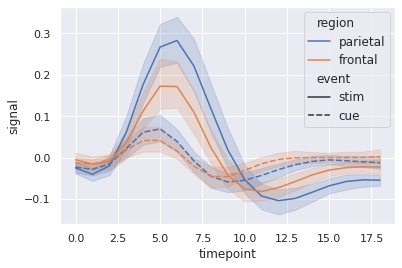

In [ ]:
sns.set_theme(style="whitegrid")

sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

NameError: ignored